## Credit Card Fraud Detection using SVM

In [ ]:
pip install numpy
pip install pandas
pip install sklearn

SyntaxError: ignored

In [ ]:
#Import Libraries

import numpy as np
import pandas as pd
import sklearn

from sklearn.preprocessing import scale, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [ ]:
# Creating a Data Frme with the dataset
df = pd.read_csv('creditcard.csv', low_memory=False)

# y = f(x) - > y: target ; f(): function/algorithm ; x: feature

df.head(5)

#Creating the Features, and Targets
x = df.iloc[::-1]
y = df['Class']

#Categorizing into Fraud and Not a Fraud

frauds = df.loc[df['Class'] == 1]
non_frauds = df.loc[df['Class'] == 0]

print("We have", len(frauds), "fraud data points and", len(non_frauds), "regular data points" )

We have 492 fraud data points and 284315 regular data points


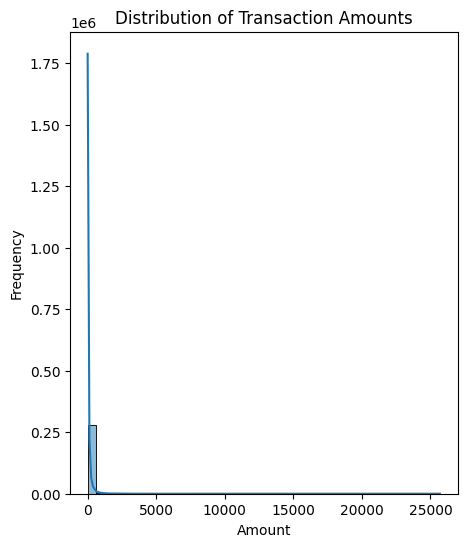

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 6))
sns.histplot(data=df, x='Amount', bins=40, kde=True)
plt.title('Distribution of Transaction Amounts')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()


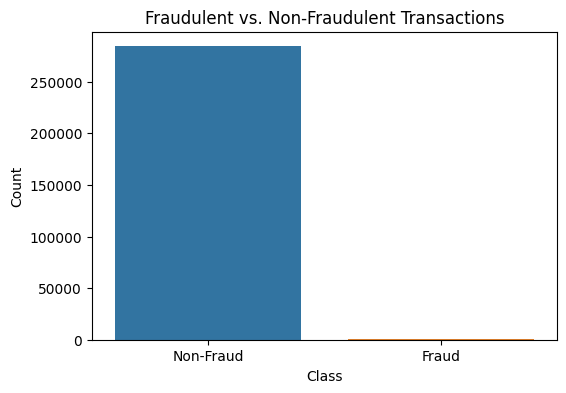

In [ ]:
#Count of Fradulent vs Non-Fradulent Transactions

plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Class')
plt.title('Fraudulent vs. Non-Fraudulent Transactions')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks([0, 1], ['Non-Fraud', 'Fraud'])
plt.show()


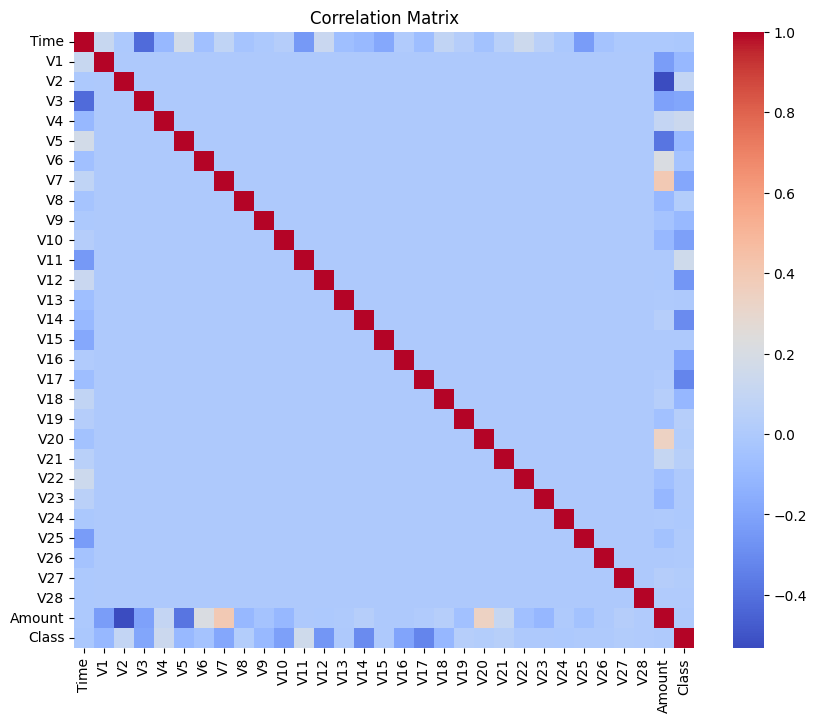

In [ ]:
# Correlation Matrix HeatMap
plt.figure(figsize=(10, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False)
plt.title('Correlation Matrix')
plt.show()


In [ ]:
# Scalarization of the Features to get combined a mean of 0 and variance of 0
x = scale(x)

In [ ]:
#Splitting into Train and Test Data sets for the model building and Testing
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state=42 )

In [ ]:
# Creating a Support Vector Machine Model
clf = svm.SVC()
clf.fit(X_train, y_train)

In [ ]:
# Predicting the Model using Test dataset
preditctions = clf.predict(X_test)

In [ ]:
# Getting the Confusion Matrix, Classification Report, and Accuracy Score
print(confusion_matrix(y_test, preditctions))
print(classification_report(y_test, preditctions))
print(accuracy_score(y_test, preditctions))

### OverSampling Correction - SMOTE Method

In [ ]:
# Over Sampled - Correction using Pandas ML and SMOTE method for OverSampling

X2_train, X2_test, y2_train, y2_test = train_test_split(x,y, test_size = 0.3, random_state=42)
df2 = pdml.ModelFrame(X2_train, target = y2_train)
sampler = df2.imbalance.over_sampling.SMOTE()
oversampled = df2.fit_sample(sampler)
y2_train = oversampled['Class']
del oversampled['Class']
X2_train = oversampled.iloc[:,:]

NameError: ignored